In [56]:
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [57]:
def load_features(teacher_id):
    t1=np.load("Data/"+teacher_id+ "/features/t_1_"+ teacher_id +".npy",allow_pickle=True)
    s1=np.load("Data/"+teacher_id+ "/features/s_1_"+ teacher_id +".npy",allow_pickle=True)
    c1=np.load("Data/"+teacher_id+ "/features/c_1_"+ teacher_id +".npy",allow_pickle=True)
    t2=np.load("Data/"+teacher_id+ "/features/t_2_"+ teacher_id +".npy",allow_pickle=True)
    s2=np.load("Data/"+teacher_id+ "/features/s_2_"+ teacher_id +".npy",allow_pickle=True)
    c2=np.load("Data/"+teacher_id+ "/features/c_2_"+ teacher_id +".npy",allow_pickle=True)
    return t1,s1,c1,t2,s2,c2

In [58]:
def merge_arr(arr):
    arr_n=[]
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            arr_n.append(arr[i][j])
    return np.array(arr_n,dtype=object)

In [59]:
def compute_mistakes(t,s,threshold):
    mistakes=[]
    for i in range(len(t)):
        diff=abs(abs(t[i])-abs(s[i]))
        if diff<=threshold:
            mistakes.append(np.float64(0))
        else:
            mistakes.append(np.float64(1))         
    return np.array(mistakes,dtype=object)

In [60]:
def compute_all_mistakes(t,s,threshold):
    all_mistakes=[]
    for i in range(len(t)):
        all_mistakes.append(compute_mistakes(t[i],s[i],threshold))
    return np.array(all_mistakes,dtype=object)

In [61]:
def get_optimal_gamma(t2,s2,c2):
    arr=[]
    for i in range(1,50,1):
        amp_mistakes=compute_mistakes(t2,s2,i)
        arr.append(sklearn.metrics.f1_score(c2.astype(int),amp_mistakes.astype(int)))
    return np.array(arr)

In [62]:
def get_optimal_beta(t1,s1,c1):
    arr=[]
    for i in range(1,50,1):
        n = i/50
        freq_mistakes=compute_mistakes(t1,s1,n*(1/12*np.log2(2)))
        arr.append(sklearn.metrics.f1_score(c1.astype(int),freq_mistakes.astype(int)))
    return np.array(arr)

In [63]:
teacher_id_1="001"
teacher_id_2="002"
freq_threshold = 1/24*np.log2(2)
amp_threshold= 7

In [64]:
t11,s11,c11,t21,s21,c21=load_features(teacher_id_1)
t12,s12,c12,t22,s22,c22=load_features(teacher_id_2)

In [66]:
t11,s11,c11,t21,s21,c21=merge_arr(t11),merge_arr(s11),merge_arr(c11),merge_arr(t21),merge_arr(s21),merge_arr(c21)
t12,s12,c12,t22,s22,c22=merge_arr(t12),merge_arr(s12),merge_arr(c12),merge_arr(t22),merge_arr(s22),merge_arr(c22)

In [67]:
arr11=get_optimal_beta(t11,s11,c11)
arr21=get_optimal_gamma(t21,s21,c21)
arr12=get_optimal_beta(t12,s12,c12)
arr22=get_optimal_gamma(t22,s22,c22)

In [75]:
beta1=((np.argmax(arr11)+1)/50)*(1/12*np.log2(2))
gamma1=np.argmax(arr21)+1
beta2=((np.argmax(arr12)+1)/50)*(1/12*np.log2(2))
gamma2=np.argmax(arr22)+1
print(beta1,gamma1,beta2,gamma2)

0.026666666666666665 7 0.008333333333333333 1


In [76]:
freq_mistakes1=compute_mistakes(t11,s11,beta1)
amp_mistakes1=compute_mistakes(t21,s21,gamma1)
freq_mistakes2=compute_mistakes(t12,s12,beta2)
amp_mistakes2=compute_mistakes(t22,s22,gamma2)

In [77]:
freq_mistakes1=freq_mistakes1.astype(int)
amp_mistakes1=amp_mistakes1.astype(int)
freq_mistakes2=freq_mistakes2.astype(int)
amp_mistakes2=amp_mistakes2.astype(int)
c11=c11.astype(int)
c21=c21.astype(int)
c12=c12.astype(int)
c22=c22.astype(int)

In [78]:
print("001")
print("Frequency Class")
print("Accuracy-",sklearn.metrics.accuracy_score(c11,freq_mistakes1))
print("F1 Score-",sklearn.metrics.f1_score(c11,freq_mistakes1))
print("\n")
print("Amplitude Class")
print("Accuracy-",sklearn.metrics.accuracy_score(c21,amp_mistakes1))
print("F1 Score-",sklearn.metrics.f1_score(c21,amp_mistakes1))

001
Frequency Class
Accuracy- 0.6886408526047239
F1 Score- 0.48415476754530984


Amplitude Class
Accuracy- 0.899401283844951
F1 Score- 0.334807155975784


In [79]:
print("002")
print("Frequency Class")
print("Accuracy-",sklearn.metrics.accuracy_score(c12,freq_mistakes2))
print("F1 Score-",sklearn.metrics.f1_score(c12,freq_mistakes2))
print("\n")
print("Amplitude Class")
print("Accuracy-",sklearn.metrics.accuracy_score(c22,amp_mistakes2))
print("F1 Score-",sklearn.metrics.f1_score(c22,amp_mistakes2))

002
Frequency Class
Accuracy- 0.658745621337816
F1 Score- 0.6579342898867373


Amplitude Class
Accuracy- 0.5516376263062842
F1 Score- 0.15926974662821392


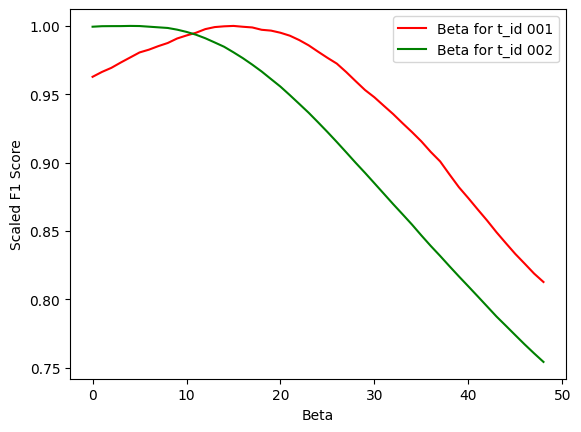

In [82]:
plt.plot(arr11/max(abs(arr11)),'r',label="Beta for t_id 001")
plt.plot(arr12/max(abs(arr12)),'g',label="Beta for t_id 002")
plt.legend()
plt.ylabel("Scaled F1 Score")
plt.xlabel("Beta")
plt.savefig("Beta.png",dpi=650)

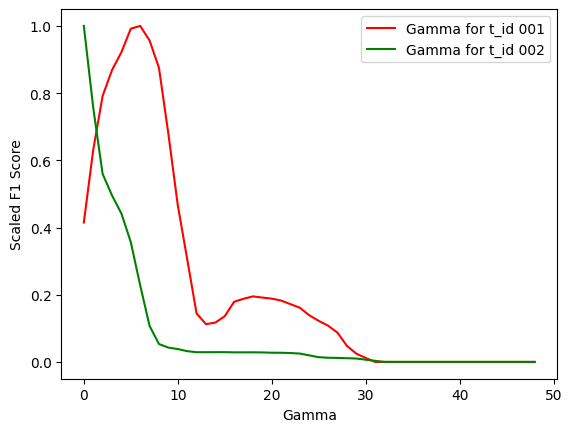

In [83]:
plt.plot(arr21/max(abs(arr21)),'r',label="Gamma for t_id 001")
plt.plot(arr22/max(abs(arr22)),'g',label="Gamma for t_id 002")
plt.legend()
plt.ylabel("Scaled F1 Score")
plt.xlabel("Gamma")
plt.savefig("Gamma.png",dpi=650)

In [1]:
# freq_threshold = 1/24*np.log2(2)
# freq_threshold